In [10]:
import pandas as pd
from plotnine import *

In [11]:
# Parameters

daily_new_rows_scraped = 45
truncate_after_months = [1, 2, 3, 4, 5, 6]

In [12]:
def calc_db_size_after_n_days(
    n,
    daily_new_rows_scraped,
    truncate_after_months,
    num_base_tables=2,
    days_in_month=30.4,
):
    rows_in_base_tables_wo_truncate = daily_new_rows_scraped * n * num_base_tables
    max_rows_in_base_tables = (
        daily_new_rows_scraped * days_in_month * truncate_after_months * num_base_tables
    )
    rows_in_base_tables = min(rows_in_base_tables_wo_truncate, max_rows_in_base_tables)
    raws_in_weekly_table = daily_new_rows_scraped * n / 7
    return rows_in_base_tables + raws_in_weekly_table


In [13]:
calc_db_size_after_n_days(30 * 12, daily_new_rows_scraped, 1)

5050.285714285714

In [14]:
results = pd.DataFrame({'days': range(1, 365 * 3)})

In [15]:
for truncate_after_month in truncate_after_months:
    results[f'truncate_after_{truncate_after_month}_months'] = results.apply(
        lambda x: calc_db_size_after_n_days(x['days'], daily_new_rows_scraped, truncate_after_month), axis=1
    )


In [16]:
results_melted = results.melt(id_vars=["days"], 
        var_name="trunc_after_n_months", 
        value_name="num_rows")

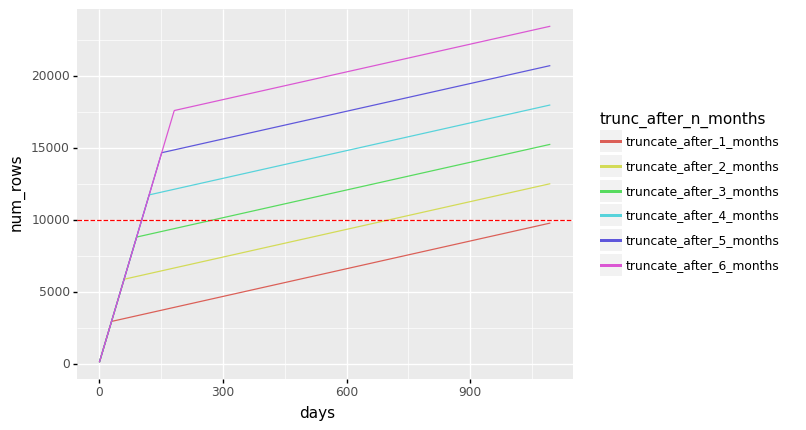

<ggplot: (8737440730769)>

In [17]:
(
    ggplot(results_melted)
        + aes(x='days', y='num_rows', color='trunc_after_n_months')
        + geom_line()
        + geom_hline(yintercept=10000, color='red', linetype='dashed')
)

In [18]:
calc_db_size_after_n_days(700, daily_new_rows_scraped, 2)

9972.0